#  INTRODUCTION


  Breast cancer remains a significant global health challenge. Early and accurate diagnosis is essential for improving survival rates and reducing treatment costs. This project aims to classify tumors as malignant or benign using machine learning, focusing on reducing false negatives to ensure timely medical interventions.

 **Dataset Description**

  The dataset used in this project contains clinical features recorded during tumor assessments, such as radius, texture, perimeter, and area. Each sample is labeled as malignant (M) or benign (B), representing the target variable.

  Source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# IMPORTING NECESSARY PACKAGES

In [1]:
# Importing all relevant packages to the project

import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np  # Importing numpy for numerical operations
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs

from sklearn.feature_selection import mutual_info_classif  # For feature selection based on mutual information
from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the dataset for better model performance
from imblearn.over_sampling import SMOTE  # To handle class imbalance by oversampling the minority class

from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models
from sklearn.svm import SVC  # Importing Support Vector Classifier for modeling
from sklearn.tree import DecisionTreeClassifier  # For building Decision Tree models
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier for modeling


# Importing evaluation metrics to assess model performance
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy
    precision_score,  # To calculate precision
    recall_score,  # To calculate recall
    f1_score,  # To calculate the F1-score
    confusion_matrix,  # To compute the confusion matrix
    ConfusionMatrixDisplay,  # To display the confusion matrix
    classification_report,  # To generate a detailed classification report
    make_scorer,  # To customize scoring metrics
    roc_curve,  # To plot the ROC curve
    roc_auc_score,  # To calculate the area under the ROC curve
    PrecisionRecallDisplay # To plot precision-recall curves
    
)

from sklearn.model_selection import (
    RandomizedSearchCV,  # For hyperparameter tuning using randomized search
    GridSearchCV,  # For exhaustive hyperparameter tuning using grid search
    cross_val_score  # For cross-validation to evaluate model stability
)


%matplotlib inline


In [2]:
# Loarding the dataset
df = pd.read_csv('Datasets/Breast_Cancer_Wisconsin_Diagnostic.csv')

pd.set_option('display.max_columns', None)

In [3]:
df

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0       0.30010          0.14710     0.2419             0.07871   1.0950   
1       0.08690          0.07017     0.1812             0.05667   0.5435   
2       0.19740          0.12790     0.2069             0.05999   0.7456   
3       0.24140          0.10520     0.2597             0.09744   0.4956   
4       0.19800          0.10430     0.1809             0.05883   0.7572   
..          ...              ...        ...                 ...      ...   
564     0.24390          0.13890     0.1726             0.05623   1.1760   
565     0.14400          0.09791     0.1752             0.05533   0.7655   
566     0.09251          0.05302     0.1590             0.05648   0.4564   
567     0.35140          0.15200     0.2397             0.07016   0.7260   
568     0.00000          0.00000     0.1587             0.05884   0.3857   

     texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0      0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1      0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2      0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3      1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4      0.7813       5.438   94.44     0.011490       0.02461     0.05688   
..        ...         ...     ...          ...           ...         ...   
564    1.2560       7.673  158.70     0.010300       0.02891     0.05198   
565    2.4630       5.203   99.04     0.005769       0.02423     0.03950   
566    1.0750       3.425   48.55     0.005903       0.03731     0.04730   
567    1.5950       5.772   86.22     0.006522       0.06158     0.07117   
568    1.4280       2.548   19.15     0.007189       0.00466     0.00000   

     concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0            0.01587    0.03003            0.006193   25.380     17.33   
1            0.01340    0.01389            0.003532   24.990     23.41   
2            0.02058    0.02250            0.004571   23.570     25.53   
3            0.01867    0.05963            0.009208   14.910     26.50   
4            0.01885    0.01756            0.005115   22.540     16.67   
..               ...        ...                 ...      ...       ...   
564          0.02454    0.01114            0.004239   25.450     26.40   
565          0.01678    0.01898            0.002498   23.690     38.25   
566          0.01557    0.01318            0.003892   18.980     34.12   
567          0.01664    0.02324            0.006185   25.740     39.42   
568          0.00000    0.02676            0.002783    9.456     30.37   

     perimeter3   area3  smoothness3  compactness3  concavity3  \
0        184.60  2019.0      0.16220       0.66560      0.7119   
1        158.80  1956.0      0.12380       0.18660      0.2416   
2        152.50  1709.0      0.14440       0.42450      0.4504   
3         98.87   567.7      0.20980       0.86630      0.6869   
4        152.20  1575.0      0.13740       0.20500      0.4000   
..          ...  

In [4]:
df.rename(columns={'Diagnosis' : 'diagnosis'}, inplace=True)

In [5]:
df.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0      0.3001          0.14710     0.2419             0.07871   1.0950   
1      0.0869          0.07017     0.1812             0.05667   0.5435   
2      0.1974          0.12790     0.2069             0.05999   0.7456   
3      0.2414          0.10520     0.2597             0.09744   0.4956   
4      0.1980          0.10430     0.1809             0.05883   0.7572   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3 diagnosis  
0     0.4601             0.11890         M  
1     0.2750             0.08902         M  
2     0.3613             0.08758         M  
3     0.6638             0.17300         M  
4     0.2364             0.07678         M

# Exploratory Data Analysis

In [6]:
def Explore_dataset(df):
    print("1. Dataset Dimensions:", df.shape)
    print("\n2. Column Names:\n", df.columns.tolist())
    print("\n3. Summary Info:")
    df.info()
    print("\n4. Missing Values per Column:\n", df.isna().sum())
    print("\n5. Duplicate Rows:", df.duplicated().sum())
    print("\n6. Duplicate Columns:", df.T.duplicated().sum())
    print("\n7. Summary Statistics:\n", df.describe())

    # Detect Outliers
    outlier_counts = {
        col: len(df[(df[col] < df[col].quantile(0.10) - 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10))) |
                    (df[col] > df[col].quantile(0.90) + 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10)))])
        for col in df.select_dtypes(include='number').columns
    }
    print("\n8. Outlier Counts:\n", outlier_counts)


Explore_dataset(df)


1. Dataset Dimensions: (569, 31)

2. Column Names:
 ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'diagnosis']

3. Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-

observation shows that each features in the dataset except the diagnosis has mean, standard error and worst or maximum value recorded as 1, 2, and 3 respectively. e.g radius1, radius2, and radius3

In [7]:
# Summary statistics of the features
df.describe()

radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         0.020310    0.161900   
50%        0.092630    0.061540         0.033500    0.179200   
75%        0.130400    0.130700         0.074000    0.195700   
max        0.345400    0.426800         0.201200    0.304000   

       fractal_dimension1     radius2    texture2  perimeter2       area2  \
count          569.000000  569.000000  569.000000  569.000000  569.000000   
mean             0.062798    0.405172    1.216853    2.866059   40.337079   
std              0.007060    0.277313    0.551648    2.021855   45.491006   
min              0.049960    0.111500    0.360200    0.757000    6.802000   
25%              0.057700    0.232400    0.833900    1.606000   17.850000   
50%              0.061540    0.324200    1.108000    2.287000   24.530000   
75%              0.066120    0.478900    1.474000    3.357000   45.190000   
max              0.097440    2.873000    4.885000   21.980000  542.200000   

       smoothness2  compactness2  concavity2  concave_points2   symmetry2  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.007041      0.025478    0.031894         0.011796    0.020542   
std       0.003003      0.017908    0.030186         0.006170    0.008266   
min       0.001713      0.002252    0.000000         0.000000    0.007882   
25%       0.005169      0.013080    0.015090         0.007638    0.015160   
50%       0.006380      0.020450    0.025890         0.010930    0.018730   
75%       0.008146      0.032450    0.042050         0.014710    0.023480   
max       0.031130      0.135400    0.396000         0.052790    0.078950   

       fractal_dimension2     radius3    texture3  perimeter3        area3  \
count          569.000000  569.000000  569.000000  569.000000   569.000000   
mean             0.003795   16.269190   25.677223  107.261213   880.583128   
std              0.002646    4.833242    6.146258   33.602542   569.356993   
min              0.000895    7.930000   12.020000   50.410000   185.200000   
25%              0.002248   13.010000   21.080000   84.110000   515.300000   
50%              0.003187   14.970000   25.410000   97.660000   686.500000   
75%              0.004558   18.790000   29.720000  125.400000  1084.000000   
max              0.029840   36.040000   49.540000  251.200000  4254.000000   

       smoothness3  compactness3  concavity3  concave_points3   symmetry3  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.132369      0.254265    0.272188         0.114606    0.290076   
std       0.022832      0.157336    0.208624         0.065732    0.061867   
min       0.071170      0.027290    0.000000         0.000000    0.156500   
25%       0.116600      0.147200    0.114500         0.064930    0.250400   
50%       0.131300      0.211900    0.226700         0.099930    0.282200   
75%       0.146000      0.339100    0.382900         0.161400    0.317900   
max       0.222600      1.058000    1.252000         0.291000    0.663800   

       f

# VISUALIZING DISTRIBUTION AND RELATIONSHIPS

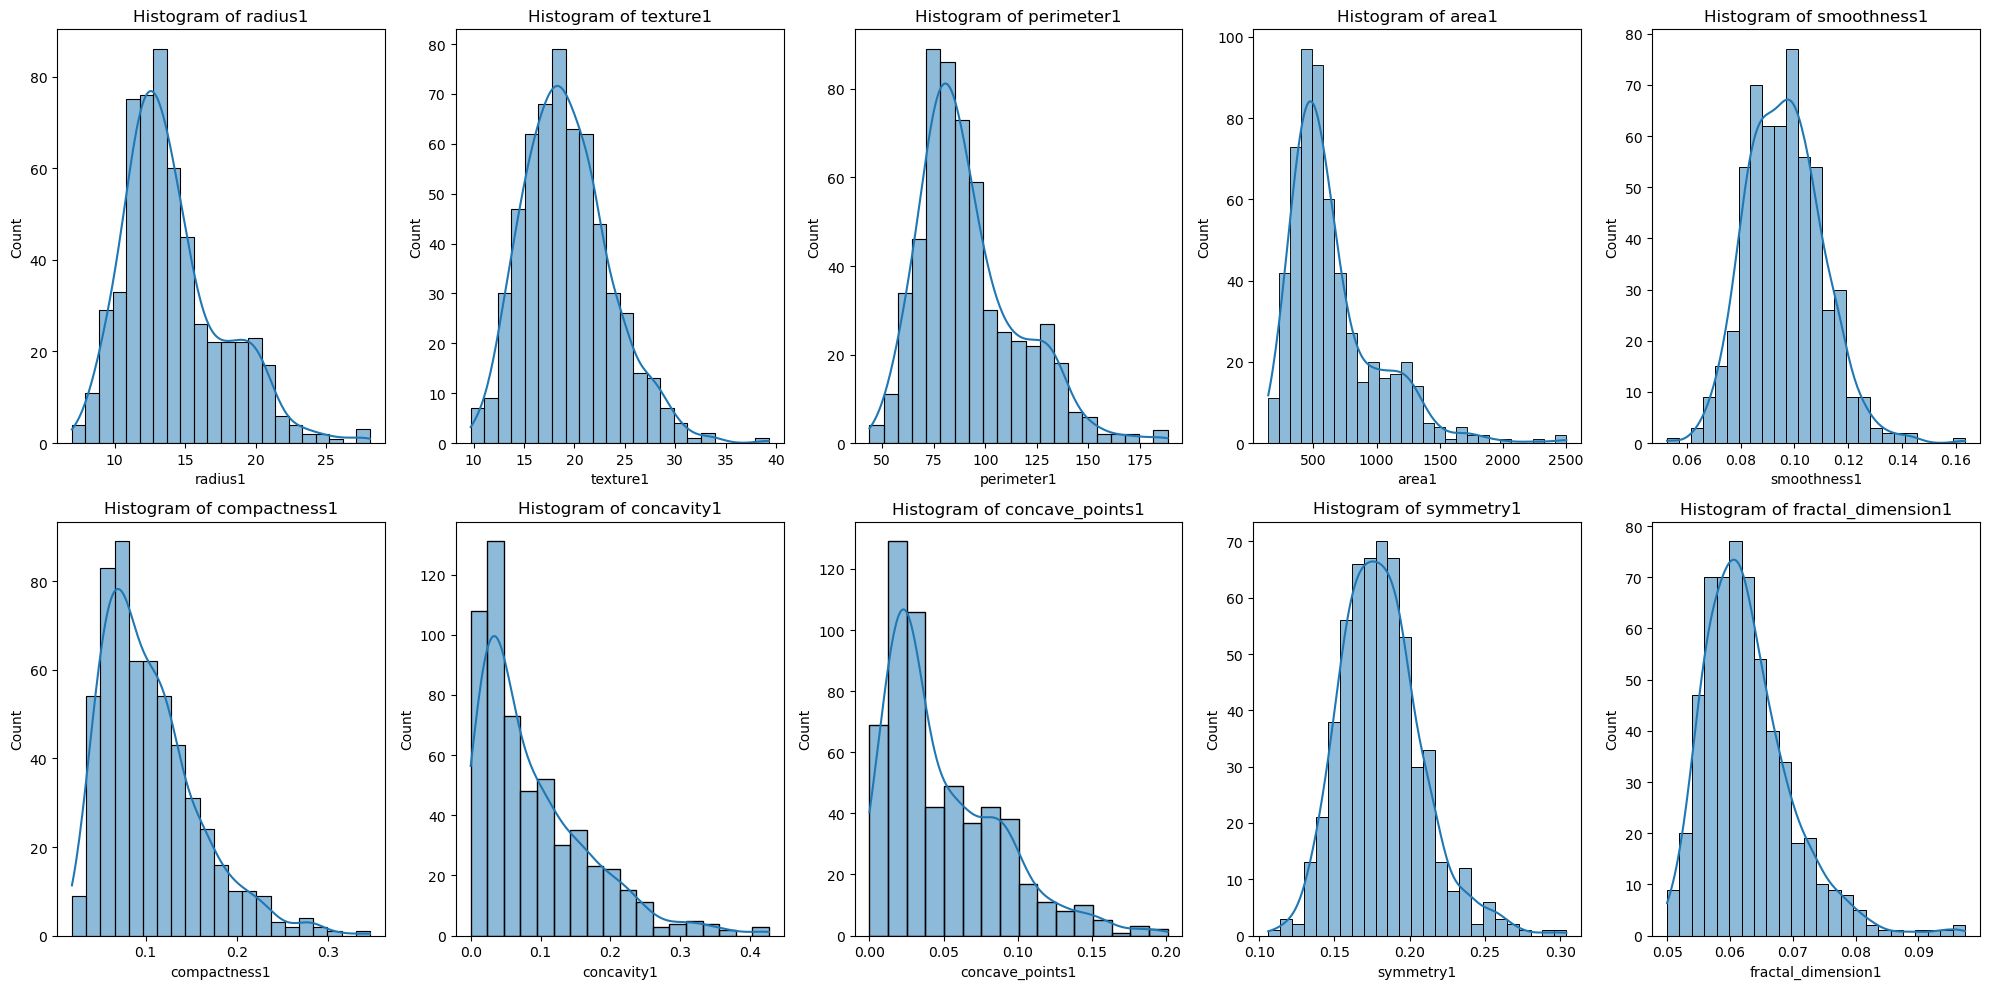

In [8]:
# Visualizing the distribution of the first 10 columns


# Slicing out the first 10 columns
features = df.iloc[:, :10]


# setting fiqure size
plt.figure(figsize=(20, 10))

# Histogram for each numerical feature
for i, col in enumerate(features.columns, start=1):
    plt.subplot(2, 5, i)  # Adjusting grid size for 10 plots
    sns.histplot(features[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

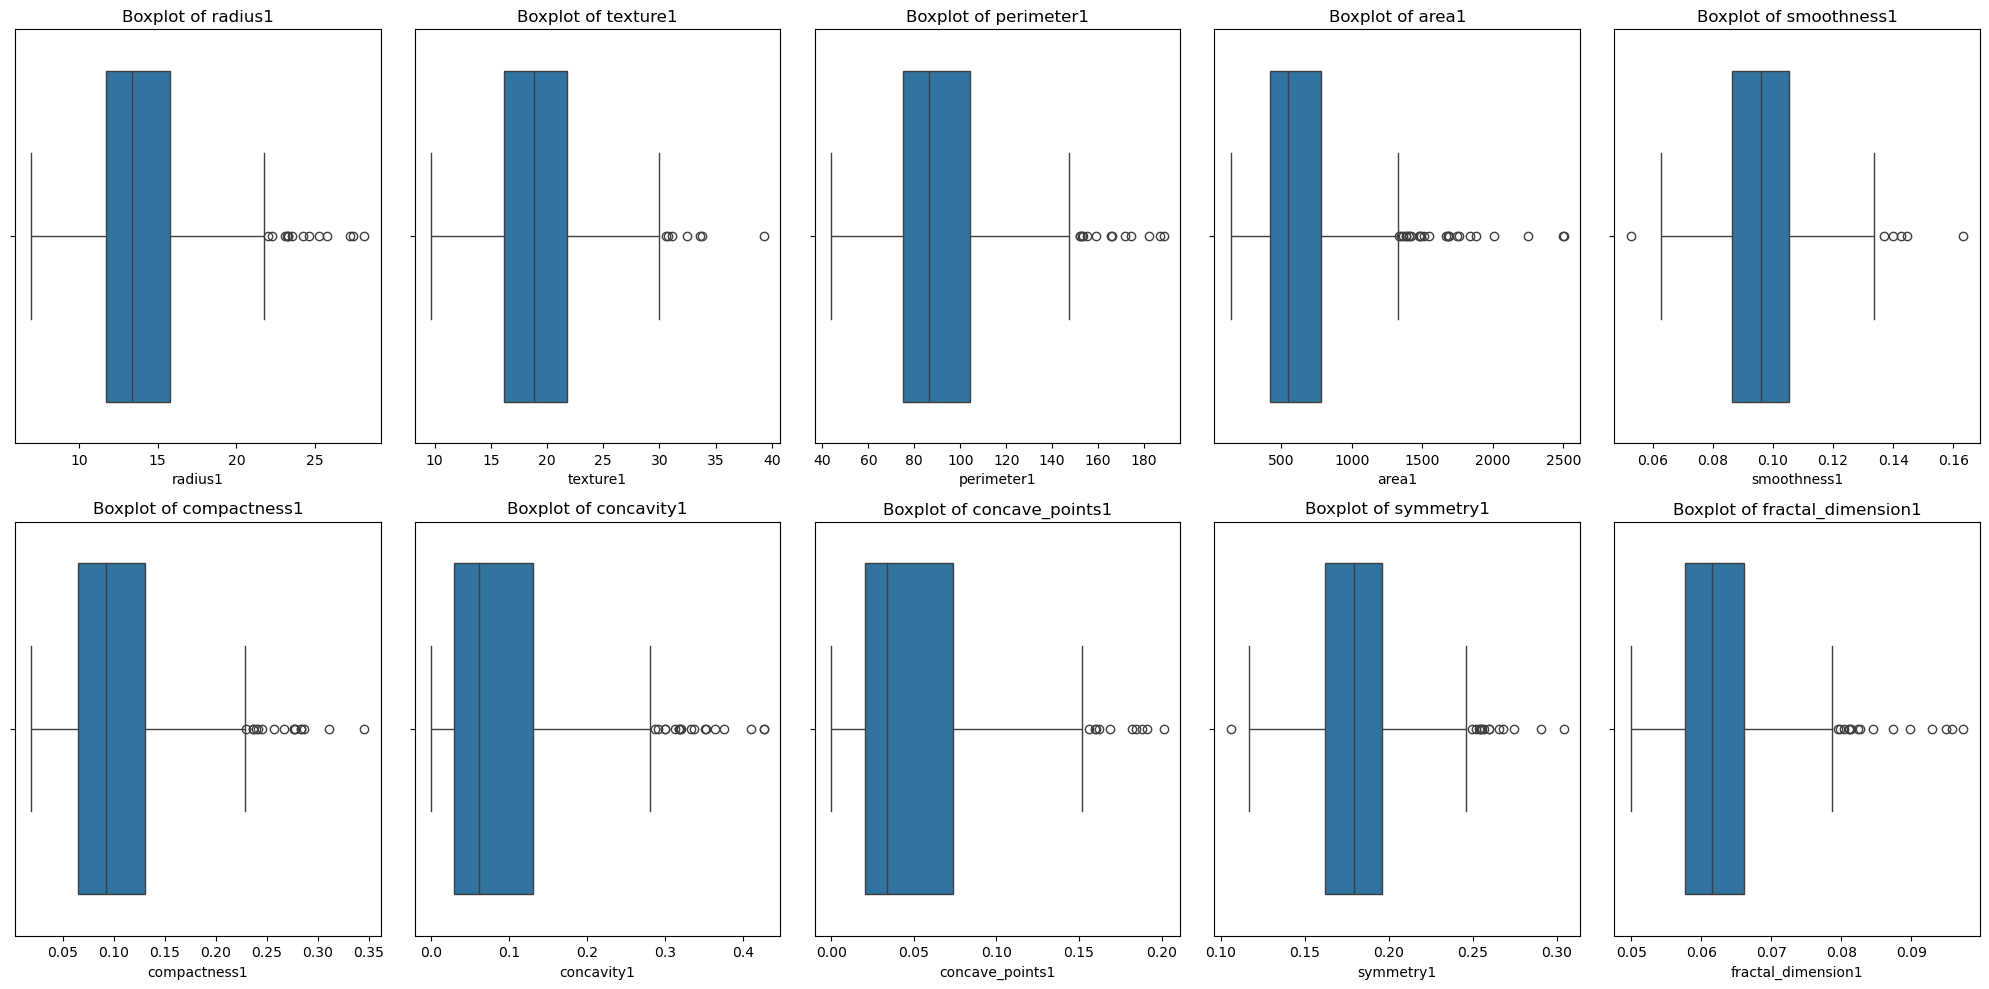

In [9]:
# Boxplot for first 10 feature

plt.figure(figsize=(20, 10))
for i, col in enumerate(features.columns, start=1):
    plt.subplot(2, 5, i)  # Adjusting grid size for 10 plots
    sns.boxplot(features[col], orient='h')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

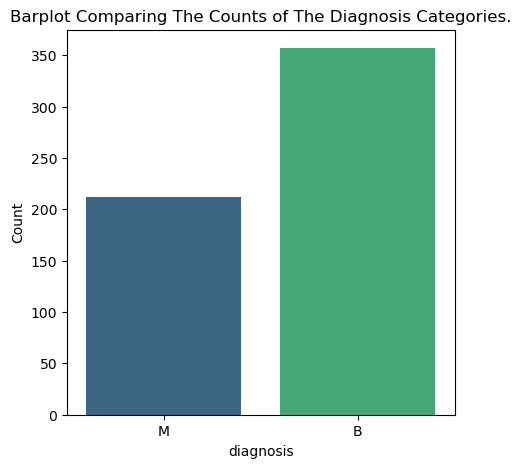

In [10]:
# bar plot comparing the counts of two diagnosis categories.
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='diagnosis', palette='viridis')

# Adding title and labels

plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.title('Barplot Comparing The Counts of The Diagnosis Categories.')
# Display the plot
plt.show()


The plot shows the distribution of diagnoses, with Benign(B) category having a higher count than the Malignant(M), providing insight into the dataset's class balance.

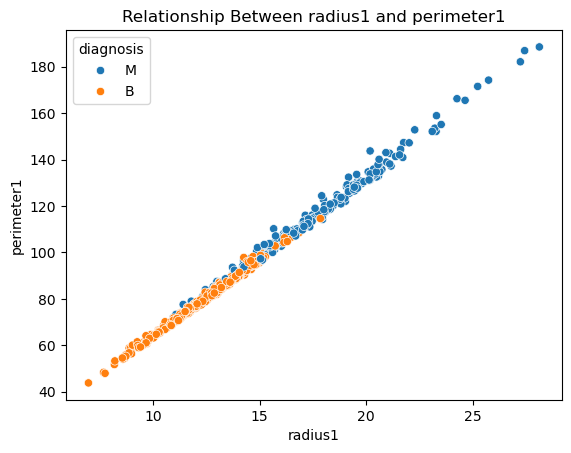

In [11]:
# Relationship Between radius1 and perimeter1
sns.scatterplot(data = df, x='radius1', y='perimeter1', hue='diagnosis')
plt.title('Relationship Between radius1 and perimeter1', fontsize=12)
plt.show()

This scatterplot shows a strong linear relationship between "radius1" and "perimeter1," with data points color-coded by diagnosis: "M" (Malignant) in blue and "B" (Benign) in orange. Malignant cases generally have larger values for both features, indicating these attributes may be useful for classification.

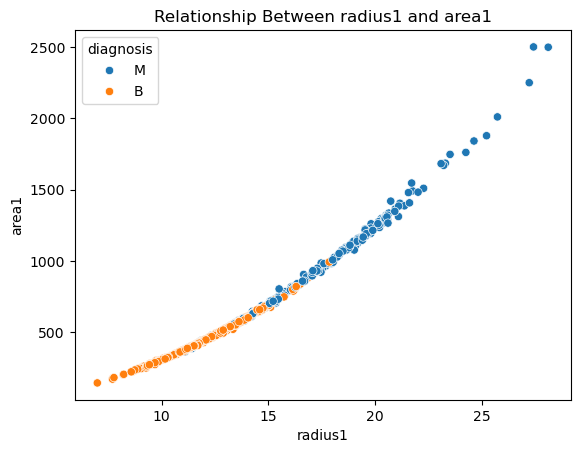

In [12]:
# Relationship Between radius1 and area1
sns.scatterplot(data = df, x='radius1', y='area1', hue='diagnosis')
plt.title('Relationship Between radius1 and area1', fontsize=12)
plt.show()

This plot shows the relationship between the radius1 and area1 features, categorized by the Diagnosis variable (M for malignant and B for benign). It suggests a positive correlation between radius1 and area1, with clear separation between the two diagnostic groups. The malignant cases (blue) generally occupy a higher range, while benign cases (orange) are clustered lower

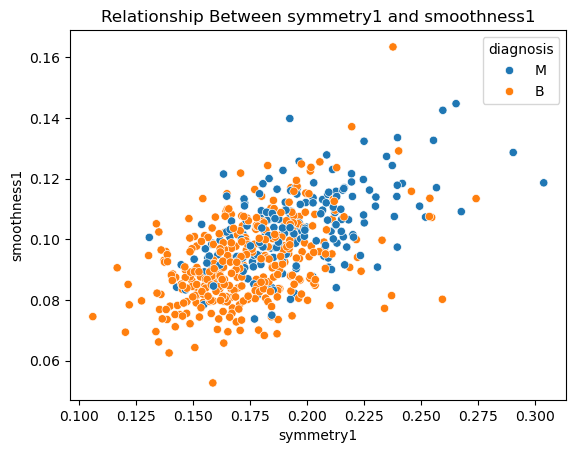

In [13]:
# Relationship Between symmetry1 and smoothness1
sns.scatterplot(data = df, x='symmetry1', y='smoothness1', hue='diagnosis')
plt.title('Relationship Between symmetry1 and smoothness1')
plt.show()

The scatterplot shows the relationship between "symmetry1" and "smoothness1," differentiated by the diagnosis categories "M" (Malignant) and "B" (Benign). Malignant cases (blue) and benign cases (orange) exhibit overlapping distributions but with some separability.

In [14]:
# Checking features correlation
corr = df.corr()
corr

radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
symmetry1           0.147741  0.071401    0.183027  0.151293     0.557775   
fractal_dimension1 -0.311631 -0.076437   -0.261477 -0.283110     0.584792   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
texture2           -0.097317  0.386358   -0.086761 -0.066280     0.068406   
perimeter2          0.674172  0.281673    0.693135  0.726628     0.296092   
area2               0.735864  0.259845    0.744983  0.800086     0.246552   
smoothness2        -0.222600  0.006614   -0.202694 -0.166777     0.332375   
compactness2        0.206000  0.191975    0.250744  0.212583     0.318943   
concavity2          0.194204  0.143293    0.228082  0.207660     0.248396   
concave_points2     0.376169  0.163851    0.407217  0.372320     0.380676   
symmetry2          -0.104321  0.009127   -0.081629 -0.072497     0.200774   
fractal_dimension2 -0.042641  0.054458   -0.005523 -0.019887     0.283607   
radius3             0.969539  0.352573    0.969476  0.962746     0.213120   
texture3            0.297008  0.912045    0.303038  0.287489     0.036072   
perimeter3          0.965137  0.358040    0.970387  0.959120     0.238853   
area3               0.941082  0.343546    0.941550  0.959213     0.206718   
smoothness3         0.119616  0.077503    0.150549  0.123523     0.805324   
compactness3        0.413463  0.277830    0.455774  0.390410     0.472468   
concavity3          0.526911  0.301025    0.563879  0.512606     0.434926   
concave_points3     0.744214  0.295316    0.771241  0.722017     0.503053   
symmetry3           0.163953  0.105008    0.189115  0.143570     0.394309   
fractal_dimension3  0.007066  0.119205    0.051019  0.003738     0.499316   

                    compactness1  concavity1  concave_points1  symmetry1  \
radius1                 0.506124    0.676764         0.822529   0.147741   
texture1                0.236702    0.302418         0.293464   0.071401   
perimeter1              0.556936    0.716136         0.850977   0.183027   
area1                   0.498502    0.685983         0.823269   0.151293   
smoothness1             0.659123    0.521984         0.553695   0.557775   
compactness1            1.000000    0.883121         0.831135   0.602641   
concavity1              0.883121    1.000000         0.921391   0.500667   
concave_points1         0.831135    0.921391         1.000000   0.462497   
symmetry1               0.602641    0.500667         0.462497   1.000000   
fractal_dimension1      0.565369    0.336783         0.166917   0.479921   
radius2                 0.497473    0.631925         0.698050   0.303379   
texture2                0.046205    0.076218         0.021480   0.128053   
perimeter2              0.548905    0.660391         0.710650   0.313893   
area2                   0.455653    0.617427         0.690299   0.223970   
smoothness2             0.135299    0.098564         0.027653   0.187321   
compactness2            0.738722    0.670279         0.490424   0.421659   
concavity2              0.570517    0.691270         0.439167   0.342627   
concave_points2         0.642262    0.683260         0.615634   0.393298   
symmetry2               0.229977    0.178009         0.095351   0.449137   
fractal_dimension2      0.507318    0.449301         0.257584   0.331786   
radius3                 0.535315    0

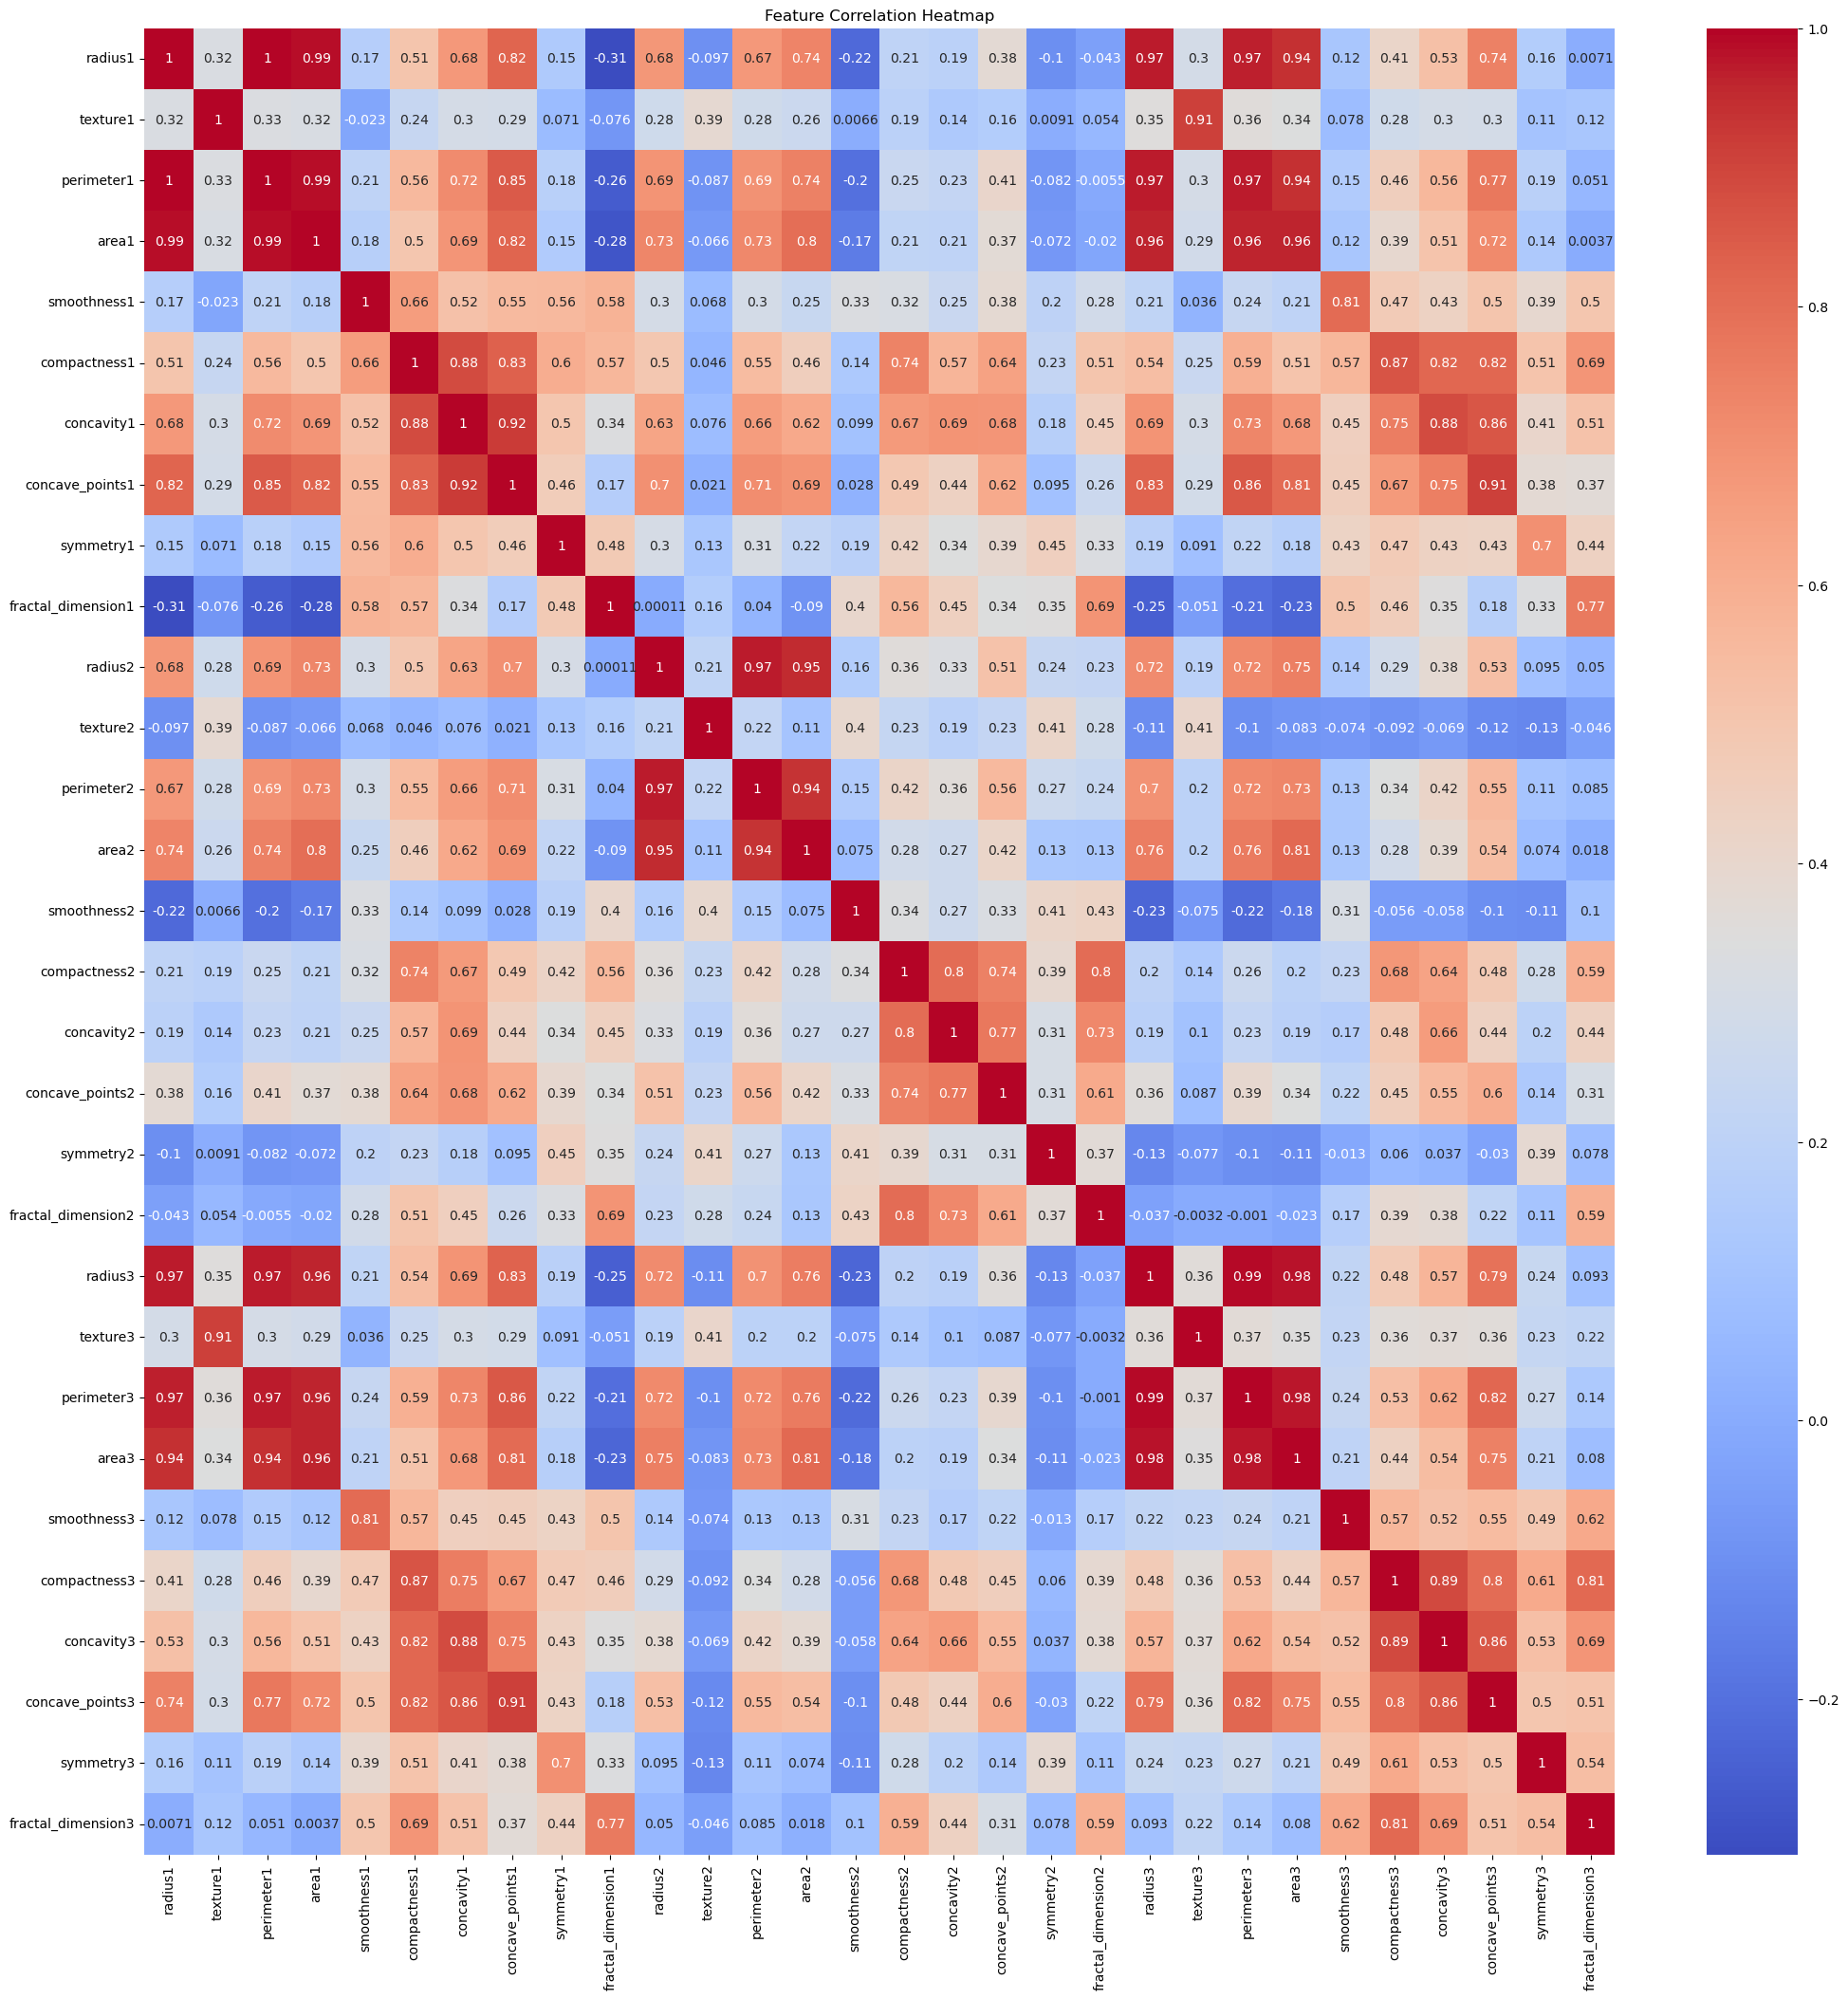

In [15]:
# Correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# FEATURE ENGINEERING

In [16]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [17]:
df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

In [18]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [19]:
df['diagnosis'] = df['diagnosis'].astype(int)

# FEATURE SELECTION

In [20]:

# Feature importance using Random Forest
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
rf = RandomForestClassifier()
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print('feature importance by randomforest')
print(importances.sort_values(ascending=False))

feature importance by randomforest
radius3               0.185930
area3                 0.119583
concave_points1       0.118865
perimeter3            0.087903
concave_points3       0.081948
perimeter1            0.062956
area1                 0.053079
concavity1            0.039841
radius1               0.034985
concavity3            0.031233
area2                 0.022178
compactness3          0.022126
texture3              0.018857
radius2               0.016469
texture1              0.012081
symmetry3             0.011583
smoothness3           0.011540
perimeter2            0.011432
concavity2            0.008566
smoothness1           0.006157
concave_points2       0.005672
compactness1          0.005593
fractal_dimension3    0.005569
symmetry1             0.005065
texture2              0.003963
compactness2          0.003913
symmetry2             0.003502
fractal_dimension2    0.003488
smoothness2           0.003113
fractal_dimension1    0.002811
dtype: float64


In [21]:

# Mutual information
mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=X.columns)
print('mutual info')
print(mi_scores.sort_values(ascending=False))

mutual info
perimeter3            0.477078
area3                 0.465433
radius3               0.453147
concave_points1       0.438004
concave_points3       0.436812
perimeter1            0.400118
concavity1            0.373226
radius1               0.365759
area1                 0.360324
area2                 0.339197
concavity3            0.316717
perimeter2            0.273672
radius2               0.248837
compactness3          0.223461
compactness1          0.213766
concave_points2       0.130637
texture3              0.124139
concavity2            0.117419
smoothness3           0.098289
texture1              0.098081
symmetry3             0.090957
smoothness1           0.077323
compactness2          0.074801
symmetry1             0.070680
fractal_dimension3    0.062955
fractal_dimension2    0.039964
smoothness2           0.017061
symmetry2             0.013631
fractal_dimension1    0.008668
texture2              0.000140
dtype: float64


*These features were choose based on their high score in both the rf.feature_importances_, and mutual_information score

concavity1, area3, radius3, radius1, concavity3, concave_points1, perimeter3, area2, concave_points3, compactness1, area1, perimeter1 plus the target feature (diagnosis)

In [22]:

selected_features = [
    "concavity1", "area3", "radius3", "radius1", "concavity3", 
    "concave_points1", "perimeter3", "area2", "concave_points3", 
    "compactness1", "area1", "perimeter1", "diagnosis"
]

# Subset the DataFrame
df = df[selected_features]

In [23]:
df.head()

concavity1   area3  radius3  radius1  concavity3  concave_points1  \
0      0.3001  2019.0    25.38    17.99      0.7119          0.14710   
1      0.0869  1956.0    24.99    20.57      0.2416          0.07017   
2      0.1974  1709.0    23.57    19.69      0.4504          0.12790   
3      0.2414   567.7    14.91    11.42      0.6869          0.10520   
4      0.1980  1575.0    22.54    20.29      0.4000          0.10430   

   perimeter3   area2  concave_points3  compactness1   area1  perimeter1  \
0      184.60  153.40           0.2654       0.27760  1001.0      122.80   
1      158.80   74.08           0.1860       0.07864  1326.0      132.90   
2      152.50   94.03           0.2430       0.15990  1203.0      130.00   
3       98.87   27.23           0.2575       0.28390   386.1       77.58   
4      152.20   94.44           0.1625       0.13280  1297.0      135.10   

   diagnosis  
0          1  
1          1  
2          1  
3          1  
4          1

In [24]:
df.shape

(569, 13)

In [25]:
df.columns

Index(['concavity1', 'area3', 'radius3', 'radius1', 'concavity3',
       'concave_points1', 'perimeter3', 'area2', 'concave_points3',
       'compactness1', 'area1', 'perimeter1', 'diagnosis'],
      dtype='object')

In [26]:
"""Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# Splitting the data into training and testing datasets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

In [27]:
train_df.head()

concavity1   area3  radius3  radius1  concavity3  concave_points1  \
10      0.03299  1150.0    19.19    16.02      0.1459          0.03323   
170     0.03987   549.1    13.50    12.32      0.1242          0.03700   
407     0.06126   645.8    14.40    12.85      0.1838          0.01867   
430     0.27330   832.7    16.35    14.90      0.9019          0.09711   
27      0.14900  1403.0    21.31    18.61      0.3446          0.07731   

     perimeter3  area2  concave_points3  compactness1   area1  perimeter1  \
10       123.80  40.51          0.09975       0.06669   797.8      102.70   
170       86.97  17.43          0.09391       0.06981   464.1       78.85   
407       91.63  41.24          0.05601       0.08316   514.5       82.63   
430      125.40  24.19          0.24750       0.22250   685.0      102.10   
27       139.90  93.54          0.14900       0.10660  1094.0      122.10   

     diagnosis  
10           1  
170          0  
407          0  
430          1  
27           1

In [28]:
test_df.head()

concavity1   area3  radius3  radius1  concavity3  concave_points1  \
120     0.03512   510.5    12.82    11.41     0.21020          0.02623   
250     0.27120  2010.0    25.58    20.94     0.69910          0.13100   
375     0.06651   861.5    16.97    16.17     0.21140          0.05397   
99      0.09388   826.4    16.33    14.42     0.31940          0.05839   
455     0.02819   705.6    15.05    13.38     0.07003          0.03264   

     perimeter3   area2  concave_points3  compactness1   area1  perimeter1  \
120       83.74   10.50          0.08958       0.06685   403.3       73.34   
250      165.30  137.90          0.21050       0.16060  1364.0      138.90   
375      113.10   14.91          0.12510       0.14380   788.5      106.30   
99       109.50   26.85          0.15650       0.11410   642.5       94.48   
455       96.69   28.93          0.07763       0.07426   557.2       86.34   

     diagnosis  
120          0  
250          1  
375          0  
99           1  
455          0

In [29]:
# Separating features (X) and target (y) for training
X_train = train_df.drop(columns='diagnosis')
y_train = train_df['diagnosis']

# Separating features (X) and target (y) for testing
X_test = test_df.drop(columns='diagnosis')
y_test = test_df['diagnosis']

In [30]:
# Standardizing the data

feature_names = X_train.columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Now X_train_scaled_df and X_test_scaled_df are DataFrames with column names

# HANDLING IMBALANCED DATA

In [31]:
# target (Diagnosis) distribution

train_df.diagnosis.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

In [32]:
# Balancing the Training set with SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0: 285, 1: 170})
Class distribution after SMOTE: Counter({1: 285, 0: 285})


In [33]:
balanced_df = pd.DataFrame(X_train_balanced, columns=train_df.drop(columns='diagnosis').columns)
balanced_df['diagnosis'] = y_train_balanced

In [34]:
balanced_df.diagnosis.value_counts()

1    285
0    285
Name: diagnosis, dtype: int64

In [35]:
# The training data has is now balanced

# INITIALIZING, TRAINING, PREDICTION AND EVALUATING THE MODELS

In [36]:
# Initilizing the models

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Models Training, Prediction, and Evaluation
evaluation_results = {}

for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    
    # Saving the Logistic Regression model and predictions
    if model_name == "Logistic Regression":
        logistic_regression_model = model
        logistic_regression_predictions = y_pred
    
    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Results
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
    }

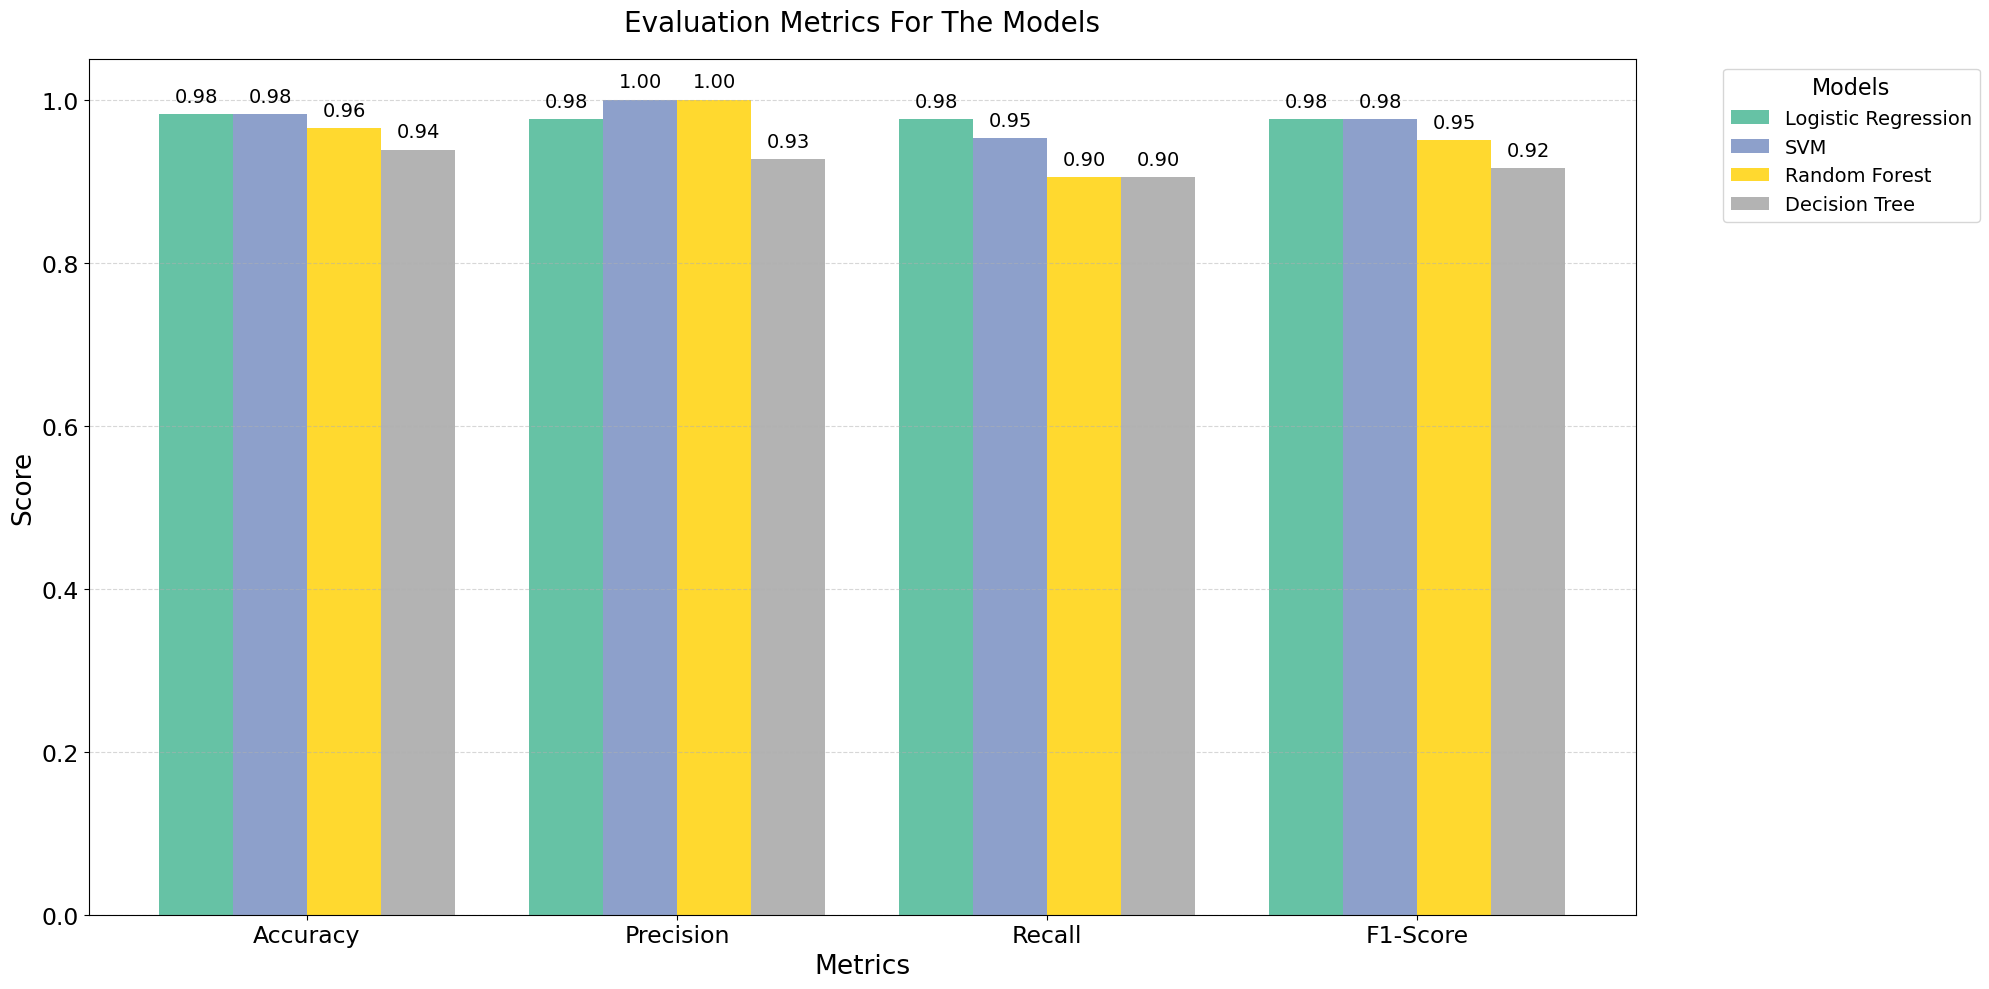

In [37]:
# Plotting Evaluation Metrics with Models
metric_names = ["accuracy", "precision", "recall", "f1"]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Preparing data for grouped bars
x = np.arange(len(metric_names))  # Indices for the metrics
width = 0.2  # Width of each bar
model_names = list(models.keys())

# Transposing data: group bars by metric
metric_values = {
    metric: [evaluation_results[model][metric] for model in model_names]
    for metric in metric_names
}

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))

colors = plt.cm.Set2(np.linspace(0, 1, len(model_names)))  # Unique colors for each model

for i, (model_name, color) in enumerate(zip(model_names, colors)):
    # Plot bars for each model
    bars = ax.bar(
        x + i * width, 
        [metric_values[metric][i] for metric in metric_names], 
        width, 
        label=model_name, 
        color=color
    )
    # Add annotations
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01, 
            f"{height:.2f}", 
            ha="center", 
            va="bottom", 
            fontsize=14,
            
        )

# Customize chart
ax.set_xticks(x + width * (len(model_names) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=17)
ax.set_ylabel("Score", fontsize=19)
ax.tick_params(axis="y", labelsize=17) # Increasing the font size of y-axis tick labels
ax.set_xlabel("Metrics", fontsize=19)
ax.set_title("Evaluation Metrics For The Models", fontsize=20, pad=20)
ax.legend(title="Models", loc="upper left", fontsize=14, title_fontsize=16, bbox_to_anchor=(1.05, 1))
ax.grid(axis="y", linestyle="--", alpha=0.5)


# Adjust layout to add space for the legend
plt.tight_layout()
plt.show()

The evaluation metrics show the Logistic Regression and SVM models perform best across all metrics, with nearly identical scores. Key points:

- Accuracy is 0.98 for both Logistic Regression and SVM.
- Precision is 1.00 for SVM and 0.98 Logistic Regression.
- Recall is 0.98 for Logistic Regression and 0.95 for SVM.
- F1-score is 0.98 for both Logistic Regression and SVM.

The Decision Tree and Random Forest models lag slightly behind, with slightly lower scores on all metrics compared to the top two models, except Precision where Decision Tree as a Precision of 1.00.
Overall, the Logistic Regression and SVM are the clear top performers based on these evaluation results. They demonstrate very strong predictive power and ability to balance precision and recall.

In [38]:
def display_metrics(model_name):
    if model_name not in evaluation_results:
        print(f"Model '{model_name}' not found.")
        return
    
    metrics = evaluation_results[model_name]
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1 Score: {metrics['f1']:.2f}")
    
    # Display confusion matrix
    cm = metrics['confusion_matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    
    # Adding annotations for the confusion matrix elements
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    colors = [["white", "black"], 
              ["black", "white"]]  # Define colors for each annotation

    # Get the axis object of the plot
    ax = plt.gca()

    # Loop through the confusion matrix to add text annotations
    dy = 0.15  # Adjust this value to move the text downward
    for (i, j), label in np.ndenumerate(labels):
        ax.text(
            j, 
            i + dy, 
            label, 
            ha="center", 
            va="center", 
            fontsize=12, 
            color=colors[i][j]
        )

    plt.show()


In [39]:
display_metrics("Logistic Regression")

Metrics for Logistic Regression:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [40]:
display_metrics("SVM")

Metrics for SVM:
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1 Score: 0.98


Metrics for Decision Tree:
Accuracy: 0.94
Precision: 0.93
Recall: 0.90
F1 Score: 0.92


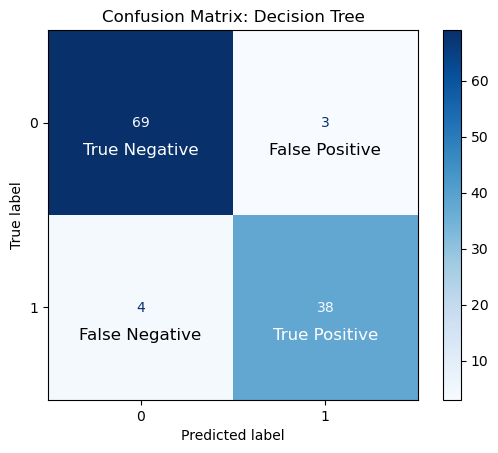

In [41]:
display_metrics("Decision Tree")

Metrics for Random Forest:
Accuracy: 0.96
Precision: 1.00
Recall: 0.90
F1 Score: 0.95


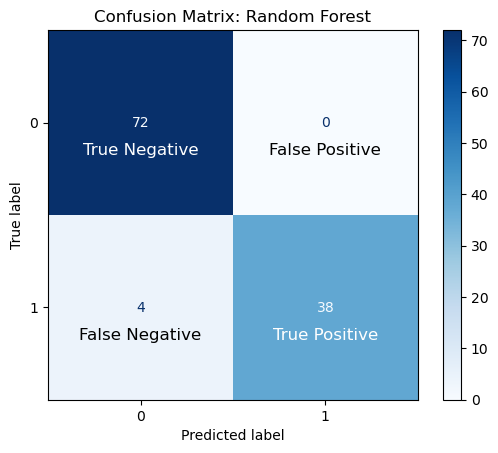

In [42]:
display_metrics("Random Forest")

# HYPERPARAMETERS TUNING AND CROSS VALIDATION

Logistic Regression - Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Precision: 0.95
Recall: 0.93
Accuracy: 0.96
F1 Score: 0.94


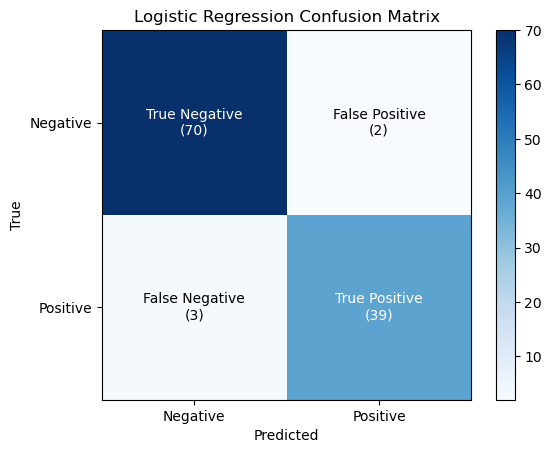

SVM - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Precision: 0.98
Recall: 0.98
Accuracy: 0.98
F1 Score: 0.98


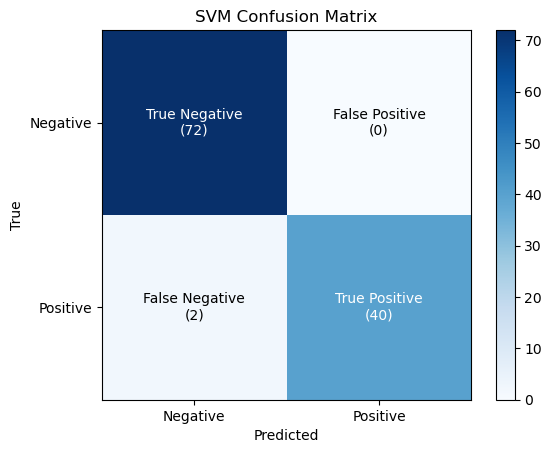

In [43]:


# Defining parameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize models
lr = LogisticRegression()
svm = SVC()

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(lr, param_grid_lr, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_lr.fit(X_train_balanced, y_train_balanced)

# GridSearchCV for SVM
grid_svm = GridSearchCV(svm, param_grid_svm, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_svm.fit(X_train_balanced, y_train_balanced)


def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
    labels = np.asarray(labels).reshape(2, 2)  # Reshape to match the confusion matrix

    # Plot the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=plt.cm.Blues)

    # Add text annotations inside the boxes
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, f"{labels[i, j]}\n({cm[i, j]})", 
                    ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    # Customize the plot
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Negative", "Positive"])
    ax.set_yticklabels(["Negative", "Positive"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
    plt.show()
    
    plt.show()



# Logistic Regression Evaluation
y_pred_lr = grid_lr.predict(X_test)
print("Logistic Regression - Best Parameters:", grid_lr.best_params_)
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")

# Logistic Regression Confusion Matrix
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

# SVM Evaluation
y_pred_svm = grid_svm.predict(X_test)
print("SVM - Best Parameters:", grid_svm.best_params_)
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.2f}")

# SVM Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")



# MODEL PERFORMANCE BEFORE AND AFTER HYPERPARATER TUNING


| **Model**              | **Metric**   | **Before Tuning** | **After Tuning** | **Observation**                                                                 |
|-------------------------|--------------|-------------------|------------------|---------------------------------------------------------------------------------|
| **Logistic Regression** | Accuracy     | 0.98              | 0.96             | Slight decrease in accuracy.                                                   |
|                         | Precision    | 0.98              | 0.95             | Precision decreased slightly.                                                  |
|                         | Recall       | 0.98              | 0.93             | Recall decreased more noticeably.                                              |
|                         | F1 Score     | 0.98              | 0.94             | F1 Score decreased, indicating a drop in balance between precision and recall. |
| **SVM**                 | Accuracy     | 0.98              | 0.98             | Accuracy remained the same.                                                    |
|                         | Precision    | 1.00              | 0.98             | Precision decreased slightly but remains high.                                 |
|                         | Recall       | 0.95              | 0.98             | Recall improved.                               |
|                         | F1 Score     | 0.98              | 0.98             | F1 Score remained consistent, indicating balanced performance.                 |

---

### **Insight**
1. **Logistic Regression**:
   - Performance slightly declined after tuning, suggesting the default parameters may have been better suited for the dataset.
   - Hyperparameter tuning might have introduced unnecessary regularization or suboptimal parameter choices.



2. **SVM**:
   - Performance improved after tuning, with recall increasing to match precision, resulting in a more balanced and reliable model.
   - Hyperparameter tuning successfully optimized the model.

---

# MODEL VISUALIZATIONS

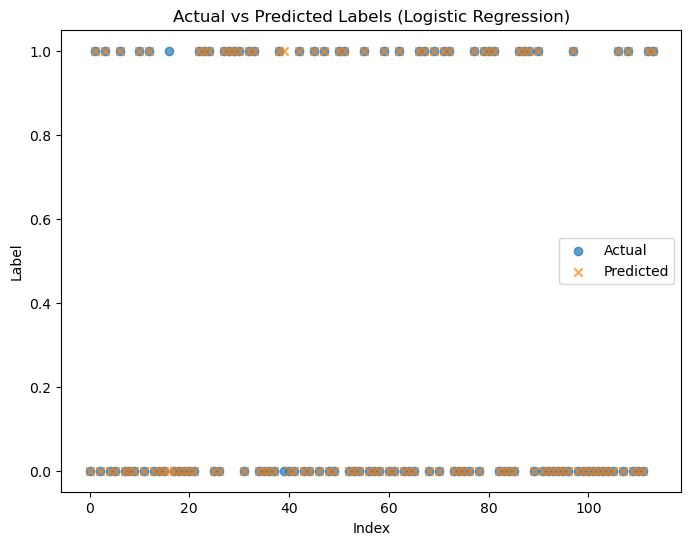

In [44]:
# Check if Logistic Regression model and predictions are available
if logistic_regression_model is not None and logistic_regression_predictions is not None:
    # Create a DataFrame of actual vs predicted
    actual_vs_predicted = pd.DataFrame({
        'Actual': y_test,
        'Predicted': logistic_regression_predictions
    }).reset_index(drop=True)

    # Plotting comparison
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Actual'], label="Actual", alpha=0.7)
    plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Predicted'], label="Predicted", alpha=0.7, marker='x')
    plt.title("Actual vs Predicted Labels (Logistic Regression)")
    plt.xlabel("Index")
    plt.ylabel("Label")
    plt.legend()
    plt.show()
else:
    print("Logistic Regression model or predictions not found. Please check the training loop.")

The plot compares **Actual vs Predicted Labels** for a **Logistic Regression** model, with **blue dots** indicating true labels and **orange crosses** representing predicted labels. Overlapping points indicate accurate predictions, while discrepancies highlight errors. Though there appear to be very errors, indicating good model performance.

In [45]:

# Predicted probabilities
y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The plot show a **Receiver Operating Characteristic (ROC) Curve**, which evaluates the performance of a classification model. The **True Positive Rate (Sensitivity)** is plotted against the **False Positive Rate (1 - Specificity)**. 

- **ROC Curve (AUC = 1.00)**: The curve reaches the top-left corner, indicating perfect classification performance with an Area Under the Curve (AUC) of 1.00.
- **Random Chance**: The diagonal line represents a model with no predictive power (AUC = 0.50).

This ROC curve suggests the model has excellent discrimination ability, correctly classifying all positive and negative instances.

In [46]:
# Plot Precision-Recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.show()

The plot shows a **Precision-Recall Curve** for a **Logistic Regression** model, with **Average Precision (AP) = 1.00**. The curve is close to the top-right corner, indicating perfect precision and recall for the positive class, making it highly effective.

In [47]:
# Get feature coefficients
coefficients = logistic_regression_model.coef_[0]
feature_names = X_train_balanced.columns  # Assuming X_train_balanced is a DataFrame

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, y='Feature', x='Coefficient', palette='rocket')
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [48]:
feature_importance

Feature  Coefficient
7             area2     2.194251
2           radius3     1.766236
1             area3     1.712542
5   concave_points1     1.500526
8   concave_points3     1.487624
6        perimeter3     1.338357
4        concavity3     0.840928
0        concavity1    -0.219959
10            area1    -0.303819
11       perimeter1    -0.527083
3           radius1    -0.570257
9      compactness1    -1.026045

##### The barplot shows that features like 

**area2** has the highest feature importance, indicating it is the most influential predictor variable.

**radius3, area3, concave_points1**, and **concave_points3** also have relatively high feature importance.

**compactness1, radius1, perimeter1**, and **area1** have negative coefficients, suggesting they have an inverse relationship with the target variable.

**Future Research Directions**   
     - Explore advanced models (e.g., XGBoost).  
     - Incorporate additional datasets to improve generalizability.  
     - Develop a pipeline for real-time diagnosis in clinical settings.  
     - Explore deep learning methods for feature extraction and classification.

Please give your suggestion

Please upvote if you like this notebook